<a href="https://colab.research.google.com/github/MicroprocessorX069/Project-K-plus-plus/blob/master/Tensorflow_2_0_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Basics

Two parts:

1. Creating a graph

In [5]:
tf.__version__

'2.2.0'

In [2]:
import tensorflow as tf
a = 2
b = 3
c = tf.add(a, b , name = 'Add')
print(c)

tf.Tensor(5, shape=(), dtype=int32)


2. Creating a session to run the graph

In [0]:
with tf.session() as sess:
    print(sess.run(c))

Source: https://github.com/aymericdamien/TensorFlow-Examples/tree/master/tensorflow_v2

In [18]:
from __future__ import print_function
import tensorflow as tf

a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)
#You can print shape using a.shape, a.dtype

add = tf.add(a, b)
div = tf.divide(a, b)

#print(add.numpy(), add.shape)
#print(div.numpy(), div.dtype)

#Matrix operations
mat1 = tf.constant([[1., 2],[3, 4]])
mat2 = tf.constant([[5., 6],[7, 8]])
product = tf.matmul(mat1, mat2) #both tensors need to be of same dtype
print(product)

tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


##Linear regression

In [0]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
rng = np.random

#Parameters
learning_rate = 0.01
training_steps = 1000
display_step = 50

# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

#Random weights and bias
W = tf.Variable(rng.randn(), name = "weight")
b = tf.Variable(rng.randn(), name = "bias")

def linear_reg(x):
  return W*x +b

def mean_sq(y_pred, y_true):
  #reduce_mean finds mean
  return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)


In [0]:
def run_optimization():
  #Wrap computation inside gradient tape for automatic differentiation
  with tf.GradientTape() as g:
    pred = linear_reg(X)
    loss = mean_sq(pred, Y)
  #compute gradients
  gradients = g.gradient(loss, [W, b])

  #Update weights and bias
  optimizer.apply_gradients(zip(gradients, [W, b]))

In [23]:
#Train

for step in range(1, training_steps +1):
  run_optimization()
  if step % display_step == 0:
    pred = linear_reg(X)
    loss = mean_sq(pred, Y)
    print("step: %i, loss: %f, W: %f, b: %f"%(step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.154261, W: 0.259683, b: 0.741742
step: 100, loss: 0.154174, W: 0.258762, b: 0.748271
step: 150, loss: 0.154106, W: 0.257947, b: 0.754054
step: 200, loss: 0.154052, W: 0.257224, b: 0.759175
step: 250, loss: 0.154010, W: 0.256585, b: 0.763709
step: 300, loss: 0.153977, W: 0.256018, b: 0.767725
step: 350, loss: 0.153951, W: 0.255517, b: 0.771281
step: 400, loss: 0.153931, W: 0.255073, b: 0.774430
step: 450, loss: 0.153915, W: 0.254679, b: 0.777219
step: 500, loss: 0.153903, W: 0.254331, b: 0.779689
step: 550, loss: 0.153893, W: 0.254022, b: 0.781876
step: 600, loss: 0.153885, W: 0.253749, b: 0.783813
step: 650, loss: 0.153880, W: 0.253507, b: 0.785528
step: 700, loss: 0.153875, W: 0.253293, b: 0.787047
step: 750, loss: 0.153871, W: 0.253103, b: 0.788392
step: 800, loss: 0.153868, W: 0.252935, b: 0.789583
step: 850, loss: 0.153866, W: 0.252786, b: 0.790638
step: 900, loss: 0.153864, W: 0.252655, b: 0.791572
step: 950, loss: 0.153863, W: 0.252538, b: 0.792400
step: 1000, l

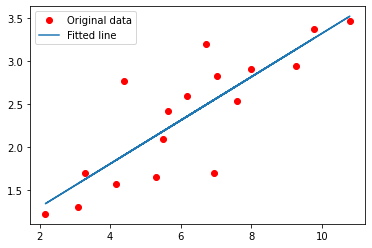

In [26]:
import matplotlib.pyplot as plt

plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, np.array(W*X+b), label = 'Fitted line')
plt.legend()
plt.show()

##Logistic regression

In [2]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np

num_classes = 10
num_features = 784

#Parameters
learning_rate = 0.01
training_steps = 1000
batch_size = 256
display_step = 50

#Dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(type(x_train), x_train.shape) <class 'numpy.ndarray'> (60000, 28, 28)

#Convert to float
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
#Flatten 27*27 to 784
x_train, x_test = x_train.reshape([-1, num_features]), \
                  x_test.reshape([-1, num_features])

#Normalize
x_train, x_test = x_train/255., x_test/255.

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#Use tf.data API to shuffle 
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
#print(train_data) #<TensorSliceDataset shapes: ((784,), ()), types: (tf.float32, tf.uint8)>
train_data = train_data.repeat() \
                        .shuffle(5000) \
                        .batch(batch_size) \
                        .prefetch(1)
#prefetch allows later elements to be prepared while the current element is being processed.                         
#print(train_data) #<PrefetchDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.uint8)>

<TensorSliceDataset shapes: ((784,), ()), types: (tf.float32, tf.uint8)>
<PrefetchDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.uint8)>


In [0]:
#Weight of shape 784, 10
W = tf.Variable(tf.ones([num_features, num_classes]), name = 'weight')
#Bias of shape 10 total no of classes
b = tf.Variable(tf.zeros([num_classes]), name = "bias")

def logistic_regression(x):
  #Applying softmax to normalize the logits to probability distribution
  return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(y_pred, y_true):
  #Encode label to a one hot vector
  y_true = tf.one_hot(y_true, depth=num_classes)
  #clip prediction values to avoid log(0) error
  y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
  #Compute cross-entropy
  return tf.reduce_mean(-tf.reduce_sum(w))

##Simple linear model

https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/01_Simple_Linear_Model.ipynb


In [0]:
!git clone https://github.com/Hvass-Labs/TensorFlow-Tutorials.git

In [0]:
%cd TensorFlow-Tutorials
!pwd

training 55000
validation 5000
test 10000


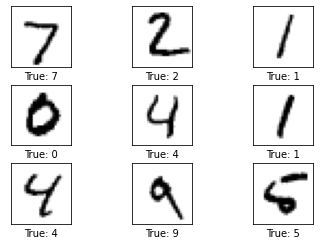

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from mnist import MNIST
data = MNIST(data_dir = "data/MNIST/")

print("training {}".format(data.num_train))
print("validation {}".format(data.num_val))
print("test {}".format(data.num_test))

img_size_flat = data.img_size_flat
img_shape = data.img_shape
num_classes = data.num_classes

def plot_images(images, cls_true, cls_pred = None):
  assert len(images) == len(cls_true) == 9

  #fig with 3x3 plots
  fig, axes = plt.subplots(3, 3)
  fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

  for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(img_shape), cmap = 'binary')

    if cls_pred is None:
      xlabel = "True: {0}".format(cls_true[i])

    else:
      xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
    ax.set_xlabel(xlabel) 
    #Remove ticks from plot
    ax.set_xticks([]) 
    ax.set_yticks([])

  plt.show()

images = data.x_test[:9]
cls_true = data.y_test_cls[:9]

plot_images(images, cls_true)

###Computational graph
Building a tensorflow graph
1. placeholder variables
2. Model variables to be optimized
3. Model
4. Cost function
5. Optimizer

In [0]:
#placeholders
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

#Model parameters
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

#Model
logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis = 1)

#Cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(
    logits = logits,
    labels = y_true
)
cost = tf.reduce_mean(cross_entropy)

#optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5) \
                    .minimize(cost)

#performance measures
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

###Tensorflow run

In [0]:
session = tf.Session()
#Initialize weights and biases and global variables
session.run(tf.global_variables_initializer())
batch_size = 100 #Stocastic gradient descent

def optimize(num_iterations):
  for i in range(num_iterations):
    #x_batch, y_true_batch: batch of images, labels
    x_batch, y_true_batch, _ = data.random_batch(batch_size = batch_size)
    #Put the batch as dict in names of placeholders
    feed_dict_train = {x:x_batch,
                       y_true: y_true_batch}
    #Run the optimizer, tf automaticaly assigns the placeholders
    session.run(optimizer, feed_dict = feed_dict_train)


In [0]:
#performance sessions
feed_dict_test = {x:data.x_test, 
                  y_true:data.y_test, 
                  y_true_cls:data.y_test_cls}

def print_accuracy():
  acc = session.run(accuracy, feed_dict = feed_dict_test)
  print("test Accuracy : {0:.1%}".format(acc))

def print_confusion_matrix():
  '''Plot confusion matrix images'''
  cls_true = data.y_test_cls
  cls_pred = session.run(y_pred_cls, feed_dict = feed_dict_test)
  #Above, y_pred_cls is the op in tf graph. check above
  cm = confusion_matrix(y_true = cls_true,
                        y_pred = cls_pred)
  print(cm)
  plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)

  plt.tight_layout()
  plt.colorbar()
  tick_marks = np.arange(num_classes)
  plt.xticks(tick_marks, range(num_classes))
  plt.yticks(tick_marks, range(num_classes))
  plt.xlabel('Predicted')
  plt.ylabel('True')

  plt.show()

def plot_example_errors():
  '''Plot wrongly classified images'''
  correct, cls_pred = session.run([correct_prediction, y_pred_cls], \
                                  feed_dict = feed_dict_test)
  #Getting indices of incorrect predictions
  incorrect = (correct == False)
  images = data.x_test[incorrect]
  cls_pred = cls_pred[incorrect]
  cls_true = data.y_test_cls[incorrect]

  plot_images(images = images[:9],
              cls_true = cls_true[:9],
              cls_pred = cls_pred[:9])
  
def plot_weights():
  w = session.run(weights)
  #min and max to correct the color intensities
  w_min = np.min(w)
  w_max = np.max(w)

  fig, axes = plt.subplots(3, 4)
  fig.subplots_adjust(hspace = 0.3, wspace = 0.3)

  for i, ax in enumerate(axes.flat):
    if i<10:
      #To get back 784 to 27*27
      image = w[:, i].reshape(img_shape)
      ax.set_xlabel("Weights: {0}".format(i))
      ax.imshow(image, vmin = w_min, vmax = w_max, cmap = 'seismic')
      ax.set_xticks([])
      ax.set_yticks([])
  plt.show()

Triggering the graph

test Accuracy : 9.8%


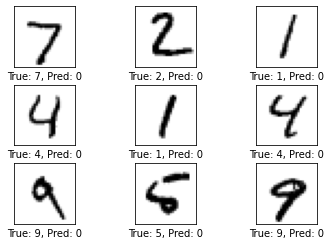

In [18]:
#Before train
print_accuracy()
plot_example_errors()


In [19]:
#1 iteration
optimize(num_iterations = 1)
print_accuracy()

test Accuracy : 25.0%


test Accuracy : 91.8%


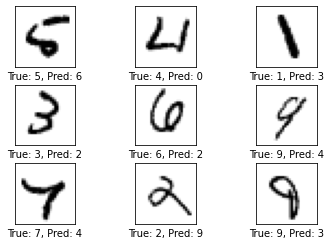

In [21]:
optimize(num_iterations = 1000)
print_accuracy()
plot_example_errors()

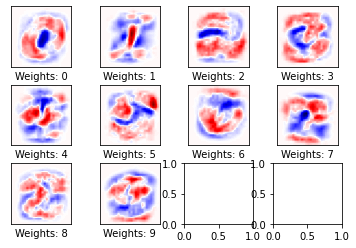

In [26]:
plot_weights()

[[ 954    0    6    1    1    5   10    1    2    0]
 [   0 1109    3    3    0    2    4    2   12    0]
 [   5    5  942   14   11    3    8   10   28    6]
 [   4    0   24  924    0   26    2    9   13    8]
 [   2    4    8    1  906    0    7    3    7   44]
 [  11    3   12   40   10  759   14    7   28    8]
 [  10    3   14    1   13    9  902    1    5    0]
 [   2    8   30    8   10    0    0  932    2   36]
 [   8   10   12   36   11   26   11   12  841    7]
 [   9    7    3   12   33    8    0   21    6  910]]


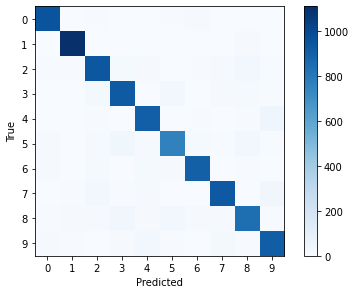

In [29]:
print_confusion_matrix()

##CNN

https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/02_Convolutional_Neural_Network.ipynb

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
#Configuration of CNN

filter_size1 = 5
num_filters1 = 16

filter_size2 = 5
num_filters2 = 36

fc_size = 128


In [38]:
#Data
from mnist import MNIST
data = MNIST(data_dir = 'data/MNIST/')

print("training: {}".format(data.num_train))
print("validation: {}".format(data.num_val))
print("test: {}".format(data.num_test))

img_size = data.img_size
img_size_flat = data.img_size_flat
img_shape = data.img_shape
num_classes = data.num_classes
num_channels = data.num_channels

training: 55000
validation: 5000
test: 10000


In [41]:
#utils

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

#utils for nn
def new_weights(shape):
  return tf.Variable(tf.truncated_normal(shape, stddev = 0.05))
  
def new_biases(length):
  return tf.Variable(tf.constant(0.05, shape = [length]))

def new_conv_layer(input, num_input_channels, filter_size, num_filters, use_pooling=True):
  shape = [filter_size, filter_size, num_input_channels, num_filters]

  weights = new_weights(shape = shape)
  biases = new_biases(length = num_filters)
  
  layer = tf.nn.conv2d(input = input, 
                        filter = weights,
                        strides = [1,1,1,1],
                        padding = 'SAME') #keep the output of the same size
  layer += biases #Adding biases to layer values
  if use_pooling:
    layer = tf.nn.max_pool(value = layer,
                           ksize = [1,2,2,1], #each for [batch_size, 28, 28, 1]
                           strides = [1,2,2,1], #basically 2x2, with stride 2x2
                           padding = 'SAME')
  #Relu:max(0,x) to add non linearity and learn more complicated func.
  layer = tf.nn.relu(layer) #normally relu before pooling
  return layer, weights

def flatten_layer(layer):
  layer_shape = layer.get_shape()
  # layer_shape == [num_images, img_height, img_width, num_channels]
  num_features = layer_shape[1:4].num_elements()
  #now flatten [batch_size, num_features]
  layer_flat = tf.reshape(layer, [-1, num_features])
  return layer_flat, num_features

#Creating a fully connected network

def new_fc_layer(input, num_inputs, num_outputs, use_relu = True):
  #For the last normal nn layer
  weights = new_weights(shape = [num_inputs, num_outputs])
  biases = new_biases(length=num_outputs)

  layer = tf.matmul(input, weights) + biases
  if use_relu:
    layer = tf.nn.relu(layer)

  return layer

#placeholders
x = tf.placeholder(tf.float32, shape = [None, img_size_flat], name = 'x')
#X_image is not a placeholder, only user args are placeholders
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape = [None, num_classes], name= 'y_true')
y_true_cls = tf.argmax(y_true, axis=1)

#Model
#Layer1
layer_conv1, weights_conv1 = \
    new_conv_layer(input = x_image,
                   num_input_channels = num_channels,
                   filter_size = filter_size1,
                   num_filters = num_filters1,
                   use_pooling = True)
    
print(layer_conv1) #14x14x16 <tf.Tensor 'Relu:0' shape=(?, 14, 14, 16) dtype=float32>
#Layer 2
layer_conv2, weights_conv2 = \
  new_conv_layer(input = layer_conv1,
                 num_input_channels = num_filters1, #16
                 filter_size = filter_size2, #5x5
                 num_filters = num_filters2, #36
                 use_pooling = True)
  
print(layer_conv2) #7x7x36 <tf.Tensor 'Relu_1:0' shape=(?, 7, 7, 36) dtype=float32>


#Flatten conv later to put in normal nn
layer_flat, num_features = flatten_layer(layer_conv2)
#<tf.Tensor 'Reshape_1:0' shape=(?, 1764) dtype=float32>  
layer_fc1 = new_fc_layer(input = layer_flat,
                num_inputs = num_features,
                num_outputs = fc_size,
                use_relu = True)
print(layer_fc1) #<tf.Tensor 'Relu_2:0' shape=(?, 128) dtype=float32>
#fc is fullyconnected
layer_fc2 = new_fc_layer(input = layer_fc1,
                         num_inputs = fc_size,
                         num_outputs = num_classes,
                         use_relu = False) #Will use softmax at end
print(layer_fc2) #<tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>          
y_pred = tf.nn.softmax(layer_fc2)
y_pred_cls = tf.argmax(y_pred, axis = 1)

#cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = layer_fc2,
                                                        labels = y_true)
cost = tf.reduce_mean(cross_entropy)

#optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = 1e-4).minimize(cost)

#performance measures
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


Tensor("Relu_2:0", shape=(?, 14, 14, 16), dtype=float32)
Tensor("Relu_3:0", shape=(?, 7, 7, 36), dtype=float32)
Tensor("Relu_4:0", shape=(?, 128), dtype=float32)
Tensor("add_8:0", shape=(?, 10), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
#Run graph
session = tf.Session()
session.run(tf.global_variables_initializer())
train_batch_size = 64
total_iterations = 0

#Optimize function
def optimize(num_iterations):
  global total_iterations
  start_time = time.time()
  for i in range(total_iterations, total_iterations+num_iterations):
    #Get the batch of input, output from training
    x_batch, y_true_batch, _ = data.random_batch(batch_size = train_batch_size)

    #Now feed in the graph AS PLACEHOLDERS
    feed_dict_train = {x : x_batch,
                       y_true: y_true_batch}
    #To train run optimizer, to test, run accuracy
    session.run(optimizer, feed_dict = feed_dict_train)

    if i%100 == 0:
      acc = session.run(accuracy, feed_dict = feed_dict_train)
      msg = "Train iteration: {0:>6}, acc:{1:>6.1%}"
      print(msg.format(i+1, acc))

    total_iterations += num_iterations
    end_time = time.time()
    time_diff = end_time - start_time
    print("Time usage: "+ str(timedelta(seconds = int(round(time_dif)))))



In [0]:
#Output visual utils

#correct is the boolean list of correct and wrong predictions
def plot_example_errors(cls_pred, correct):
  #Get indices of incorrect 
  incorrect = (correct == False)
  images = data.x_test[incorrect]
  cls_pred = cls_pred[incorrect]
  cls_true = data.y_test[incorrect]
  plot_images(images = images[:9],
              cls_true = cls_true[:9],
              cls_pred = cls_pred[:9])
  
def plot_confusion_matrix(cls_pred):
  cls_true = data.y_test_cls
  cm = confusion_matrix(y_true = cls_true,
                        y_pred = cls_pred)
  #print(cm)
  plt.matshow(cm)

  plt.colorbar()
  tick_marks = np.arange(num_classes)
  plt.xticks(tick_marks, range(num_classes))
  plt.yticks(tick_marks, range(num_classes))
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

 test_batch_size = 256
 def print_test_accuracy(show_example_errors = False, 
                         show_confusion_matrix = False):
   num_test = data.num_test
   cls_pred = np.zeros(shape = num_test, dtype = np.int)
   i = 0
   while i<num_test:
     j = min(i + test_batch_size, num_test)
     images = data.x_test[i:j, :]
     labels = data.y_test[i:j, :]
     feed_dict = {x:images, 
                  y_true: labels}
     cls_pred[i:j] = session.run(y_pred_cls, feed_dict = feed_dict)
     i = j
     cls_true = data.y_test_cls
     correct = (cls_true == cls_pred)
     correct_sum = correct.sum()
     acc = float(correct_sum) / num_test
     msg = "Test accuracy: {0:.1%} ({1}/{2})"
     print(msg.format(acc, correct_sum, num_test))

     if show_example_errors:
       print("Example errors: ")
       plot_example_errors(cls_pred=cls_pred, correct = correct)
     
     if show_confusion_matrix:
       print("Confusion matrix: ")
       plot_confusion_matrix(cls_pred = cls_pred)
  